In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from pathlib import Path

In [2]:
FILE_PATH = Path("../../Data/Raw/D202.csv")
SAVE_FILE_PATH = Path("../../Data/Processed/energy_comsuption.csv")

In [3]:
df = pd.read_csv(FILE_PATH)

In [4]:
df

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN
...,...,...,...,...,...,...,...,...
70363,Electric usage,10/24/2018,22:45,22:59,0.02,kWh,$0.00,NaN
70364,Electric usage,10/24/2018,23:00,23:14,0.03,kWh,$0.01,NaN
70365,Electric usage,10/24/2018,23:15,23:29,0.03,kWh,$0.01,NaN
70366,Electric usage,10/24/2018,23:30,23:44,0.03,kWh,$0.01,NaN


In [5]:
df = df.drop(df.columns[[0, 5, 7]], axis=1)

In [6]:
df.DATE = pd.to_datetime(df.DATE)

In [7]:
df.index = df.DATE

In [8]:
df = df.drop('DATE',axis = 1)

In [9]:
df.COST = df.COST.replace('[\$,]', '', regex=True).astype(float)

In [10]:
df = df.drop(['START TIME', 'END TIME'], axis = 1)

In [11]:
df = df.resample('1D').sum()

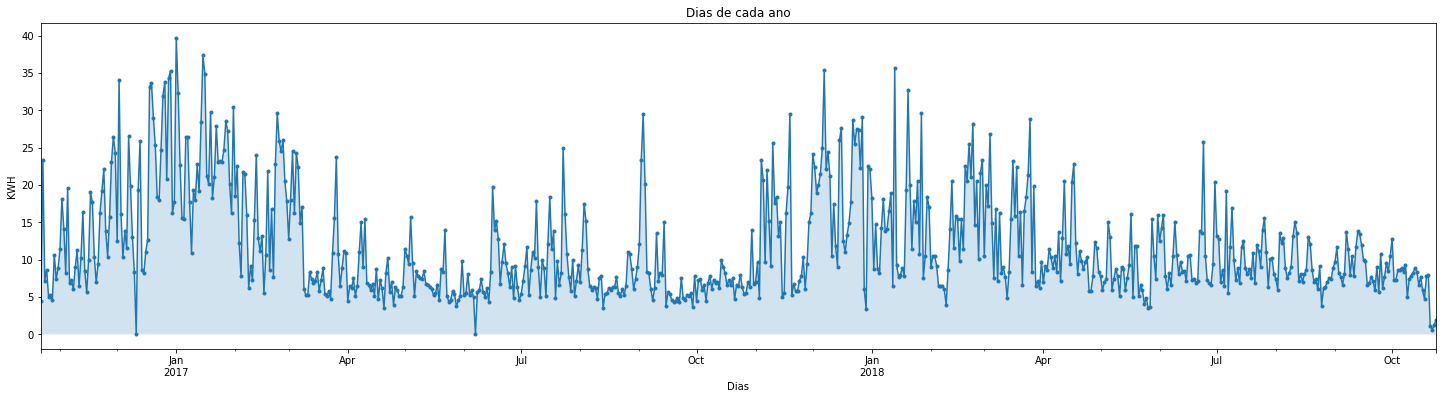

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(25, 6))
df['USAGE'].plot(ax=ax, marker='.')
ax.fill_between(df.index, df['USAGE'], alpha=.2)
ax.set_ylabel("KWH")
ax.set_xlabel('Dias')
ax.set_title("Dias de cada ano");

In [13]:
df = pd.DataFrame({'DATE': df['USAGE'].index.tolist(), 'COMSUPTION_KWH': df['USAGE'].tolist(), 'COST': df['COST'].tolist()})

In [14]:
df['MOUNTH_GOAL'] = [300.0 for i in range(df.DATE.size)]

In [15]:
df

,DATE,COMSUPTION_KWH,COST,MOUNTH_GOAL
0,2016-10-22,4.52,0.60,300.0
1,2016-10-23,23.32,4.36,300.0
2,2016-10-24,7.16,1.20,300.0
3,2016-10-25,8.68,1.60,300.0
4,2016-10-26,5.04,0.84,300.0
...,...,...,...,...
728,2018-10-20,8.00,1.68,300.0
729,2018-10-21,1.12,0.16,300.0
730,2018-10-22,0.64,0.04,300.0
731,2018-10-23,1.20,0.00,300.0


In [16]:
df.to_csv(SAVE_FILE_PATH, index=False, header=False, encoding='utf-8')